In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_excel("data set 1.xlsx")
print("The data is successfully imported")
data.head()

The data is successfully imported


,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
x=data.drop('scores',axis=1)
x.head()

,hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y=data['scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: scores, dtype: int64

C:\Users\rd\AppData\Local\Temp\ipykernel_21176\2059180006.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


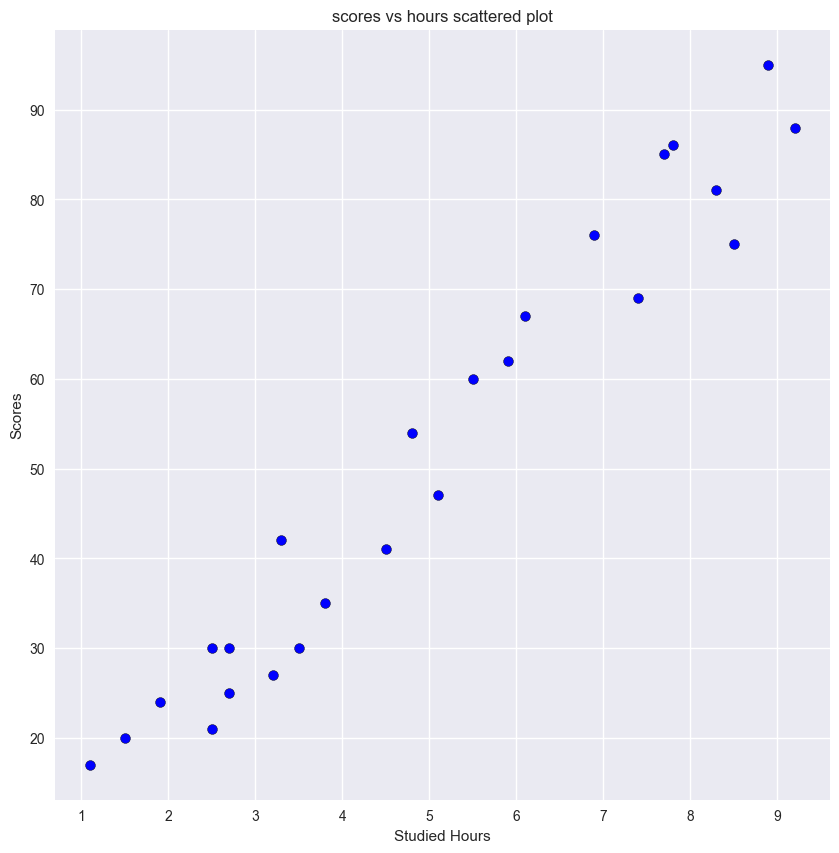

In [11]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.scatter(x,y,s=50,edgecolors="black",c="blue")
plt.title("scores vs hours scattered plot")
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
line = regressor.coef_*x+regressor.intercept_

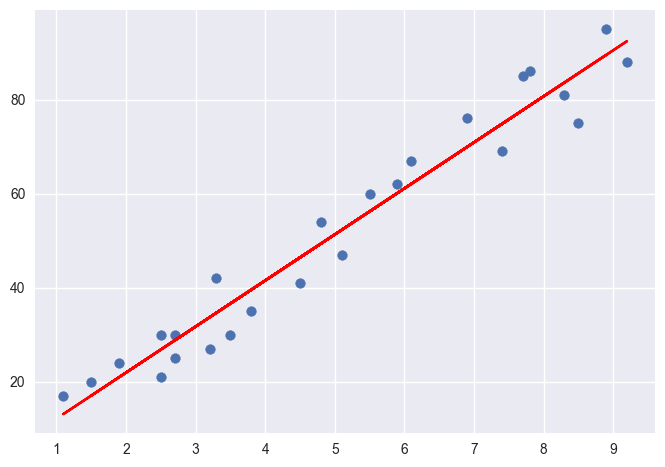

In [16]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color = 'red');
plt.show()

In [17]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [19]:
#Evaluating the model
print("Accuracy:", round(regressor.score(X_test, y_test), 2))

Accuracy: 0.96


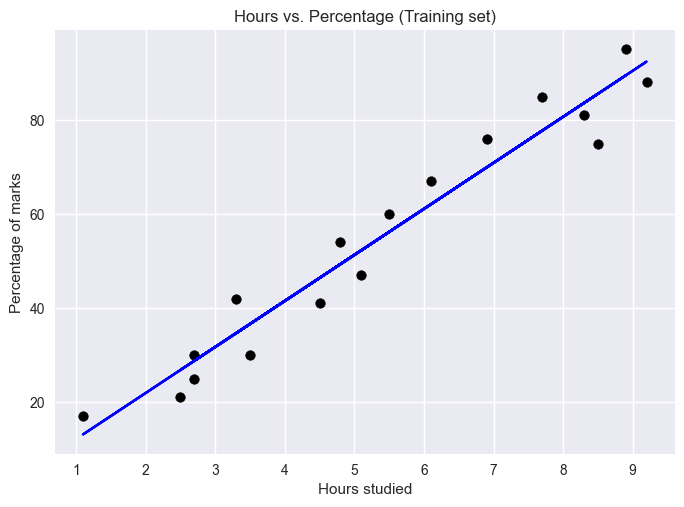

In [21]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

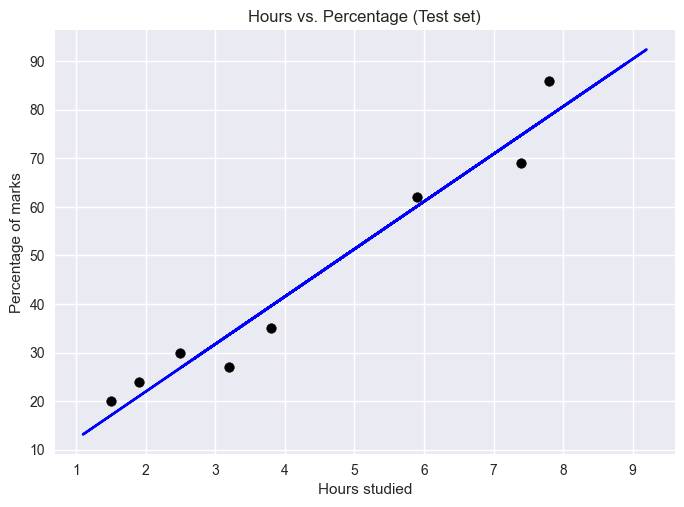

In [22]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [23]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [24]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}%.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723]%.


C:\Users\rd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import pickle
pickle.dump(regressor, open('regressor.pkl','wb'))